In [1]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt
sns.set()
color = sns.color_palette()
color

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [2]:
#setup para el notebook

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
data_dir = "C:\\Users\Rafael\\Documents\\data\\instacart\\raw"
train = pd.read_csv(data_dir + "/order_products__train.csv")
prior = pd.read_csv(data_dir + "/order_products__prior.csv")
orders = pd.read_csv(data_dir + "/orders.csv", index_col="order_id")
products = pd.read_csv(data_dir + "/products.csv", index_col="product_id")
aisles = pd.read_csv(data_dir + "/aisles.csv", index_col="aisle_id")
departments = pd.read_csv(data_dir + "/departments.csv", index_col="department_id")

In [4]:
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [5]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [6]:
orders

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,nan
2398795,1,prior,2,3,7,15.00
473747,1,prior,3,3,12,21.00
2254736,1,prior,4,4,7,29.00
431534,1,prior,5,4,15,28.00
...,...,...,...,...,...,...
2266710,206209,prior,10,5,18,29.00
1854736,206209,prior,11,4,10,30.00
626363,206209,prior,12,1,12,18.00


In [7]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [8]:
orders[orders.index == 1]

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
1,112108,train,4,4,10,9.00


In [9]:
orders[orders.user_id == 112108]

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
1427983,112108,prior,1,1,14,nan
2541372,112108,prior,2,1,10,7.00
186706,112108,prior,3,2,21,15.00
1,112108,train,4,4,10,9.00


In [10]:
orders.index.is_monotonic

False

In [11]:
orders.index.is_unique

True

In [12]:
last_order = orders.groupby(["user_id", "eval_set"]).order_number.max()
last_order

user_id  eval_set
1        prior       10
         train       11
2        prior       14
         train       15
3        prior       12
                     ..
206207   test        17
206208   prior       49
         test        50
206209   prior       13
         train       14
Name: order_number, dtype: int64

In [13]:
last_order = pd.crosstab(orders.user_id, orders.eval_set, values=orders.order_number, aggfunc=np.max)
last_order

eval_set,prior,test,train
user_id,,,
1,10.00,nan,11.00
2,14.00,nan,15.00
3,12.00,13.00,nan
4,5.00,6.00,nan
5,4.00,nan,5.00
...,...,...,...
206205,3.00,nan,4.00
206206,67.00,68.00,nan
206207,16.00,17.00,nan


In [14]:
last_order[["test", "train"]].notnull().sum(axis=1).value_counts()

1    206209
dtype: int64

In [15]:
dist = orders.eval_set.value_counts()
dist.loc["test"] + dist.loc["train"] 

206209

In [16]:
orders.user_id.unique().shape

(206209,)

In [17]:
orders[orders.eval_set == "train"].order_number.value_counts().sort_index()

4      15300
5      12439
6      10337
7       8853
8       7357
       ...  
96        44
97        30
98        31
99        31
100      867
Name: order_number, dtype: int64

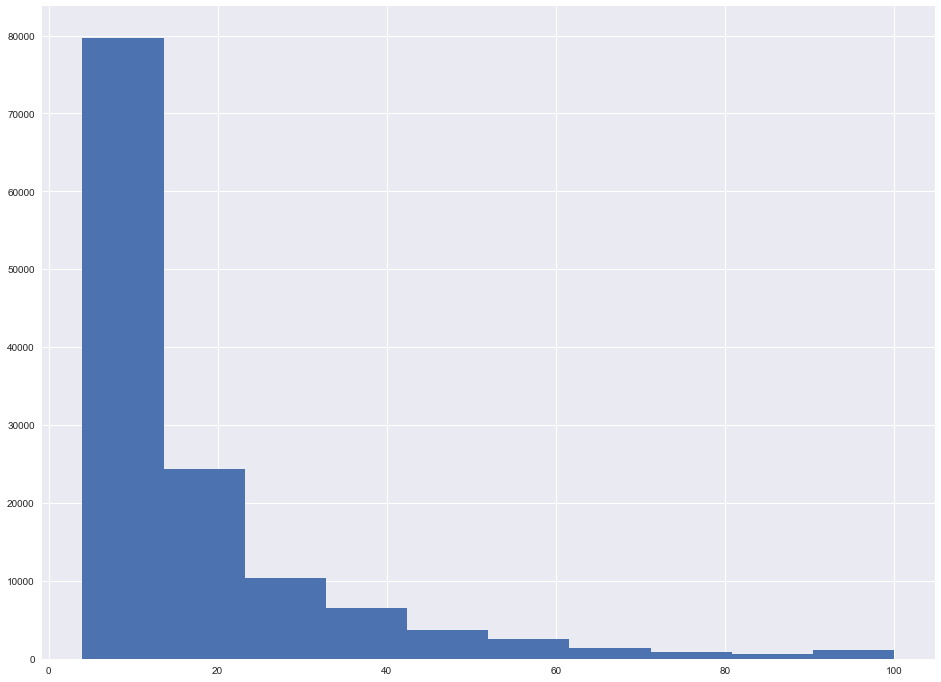

In [18]:
orders[orders.eval_set == "train"].order_number.hist()

In [19]:
orders[orders.eval_set == "train"].order_number.value_counts()

4     15300
5     12439
6     10337
7      8853
8      7357
      ...  
95       39
93       33
98       31
99       31
97       30
Name: order_number, dtype: int64

In [20]:
orders[orders.eval_set == "test"].order_number.value_counts().sort_index()

4      8686
5      7151
6      5828
7      4997
8      4343
       ... 
96       23
97       24
98       19
99       16
100     507
Name: order_number, dtype: int64

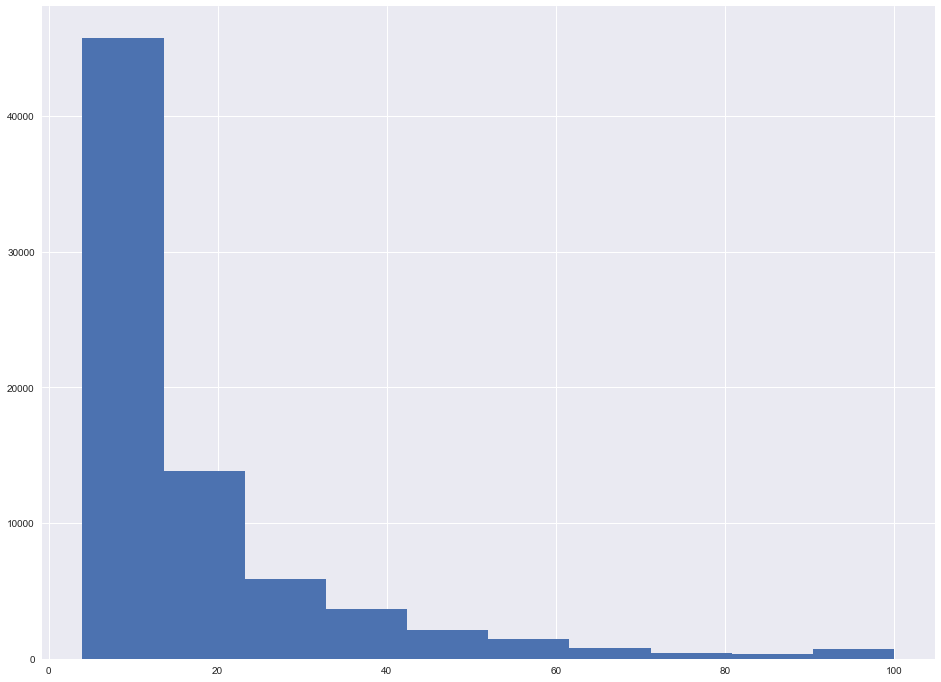

In [21]:
orders[orders.eval_set == "test"].order_number.hist()

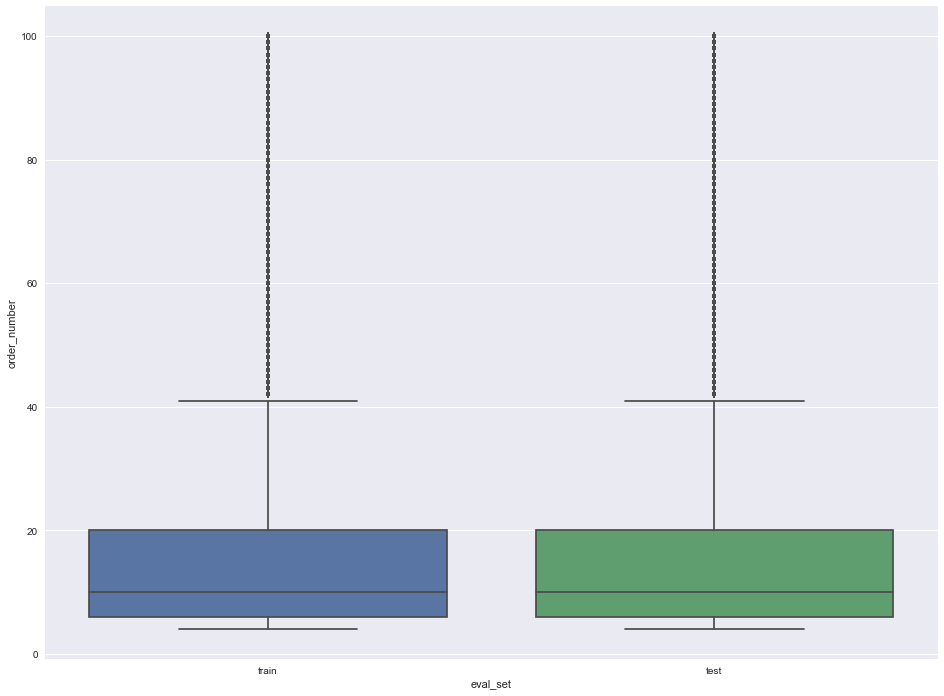

In [22]:
sns.boxplot(data=orders[orders.eval_set != "prior"][["order_number", "eval_set"]], x="eval_set", y="order_number")

In [23]:
from scipy.stats import ks_2samp
ks_2samp(orders[orders.eval_set == "train"].order_number, orders[orders.eval_set == "test"].order_number)

Ks_2sampResult(statistic=0.0024882368333473126, pvalue=0.92884587760799597)

In [24]:
pd.concat([orders[orders.eval_set == "train"].order_number.describe().rename("train"),
           orders[orders.eval_set == "test"].order_number.describe().rename("test")], axis=1)

,train,test
count,"131,209.00","75,000.00"
mean,16.60,16.57
std,16.66,16.64
min,4.00,4.00
25%,6.00,6.00
50%,10.00,10.00
75%,20.00,20.00
max,100.00,100.00


In [25]:
train.reordered.value_counts(True)

1   0.60
0   0.40
Name: reordered, dtype: float64

In [26]:
orders.days_since_prior_order.describe() 

count   3,214,874.00
mean           11.11
std             9.21
min             0.00
25%             4.00
50%             7.00
75%            15.00
max            30.00
Name: days_since_prior_order, dtype: float64

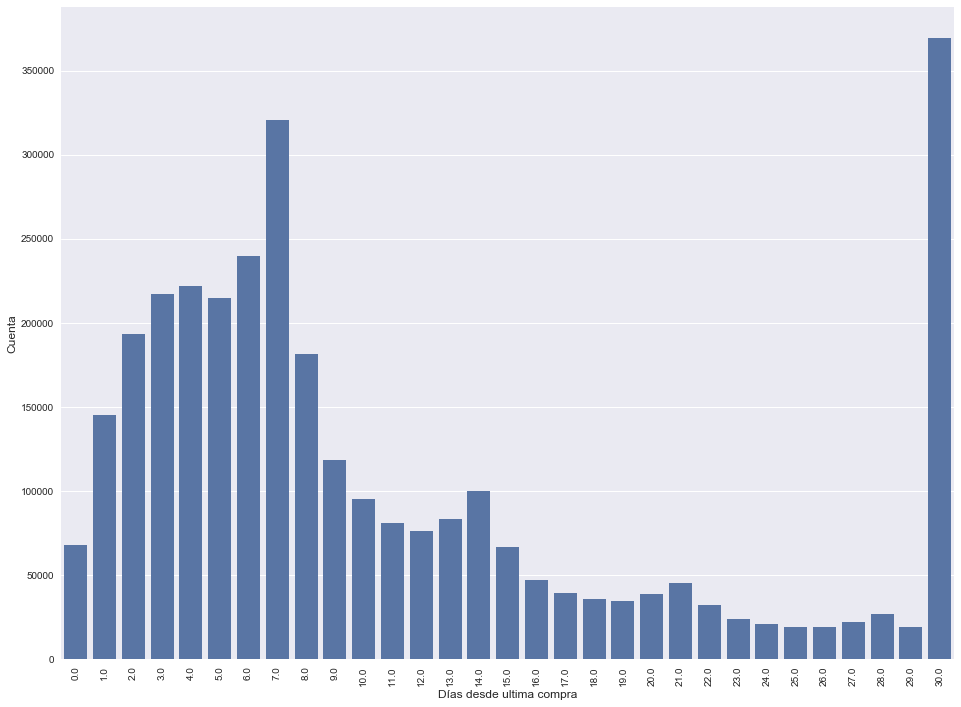

In [27]:
sns.countplot(x="days_since_prior_order", data=orders, color=color[0])
plt.ylabel('Cuenta', fontsize=12)
plt.xlabel('Días desde ultima compra', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
train = train.join(orders.days_since_prior_order, on="order_id")
train[train.days_since_prior_order == 0].reordered.value_counts(1)

1   0.82
0   0.18
Name: reordered, dtype: float64

In [29]:
train.days_since_prior_order.value_counts(1).sort_index()

0.00    0.01
1.00    0.01
2.00    0.02
3.00    0.03
4.00    0.03
        ... 
26.00   0.01
27.00   0.01
28.00   0.02
29.00   0.01
30.00   0.29
Name: days_since_prior_order, dtype: float64

In [30]:
temp = pd.crosstab(train.days_since_prior_order, train.reordered)
temp.columns = ["non_reorder_count", "reorder_count"]
temp = temp.join(pd.crosstab(train.days_since_prior_order, train.reordered).apply(lambda x: x / x.sum(), axis=1))
temp.columns = ["non_reorder_count", "reorder_count", "non_reorder_prop", "reorder_prop"]
temp

,non_reorder_count,reorder_count,non_reorder_prop,reorder_prop
days_since_prior_order,,,,
0.00,2996,14048,0.18,0.82
1.00,7412,11853,0.38,0.62
2.00,10460,17044,0.38,0.62
3.00,12676,23874,0.35,0.65
4.00,14838,30889,0.32,0.68
...,...,...,...,...
26.00,5264,7236,0.42,0.58
27.00,6411,9049,0.41,0.59
28.00,8802,12421,0.41,0.59


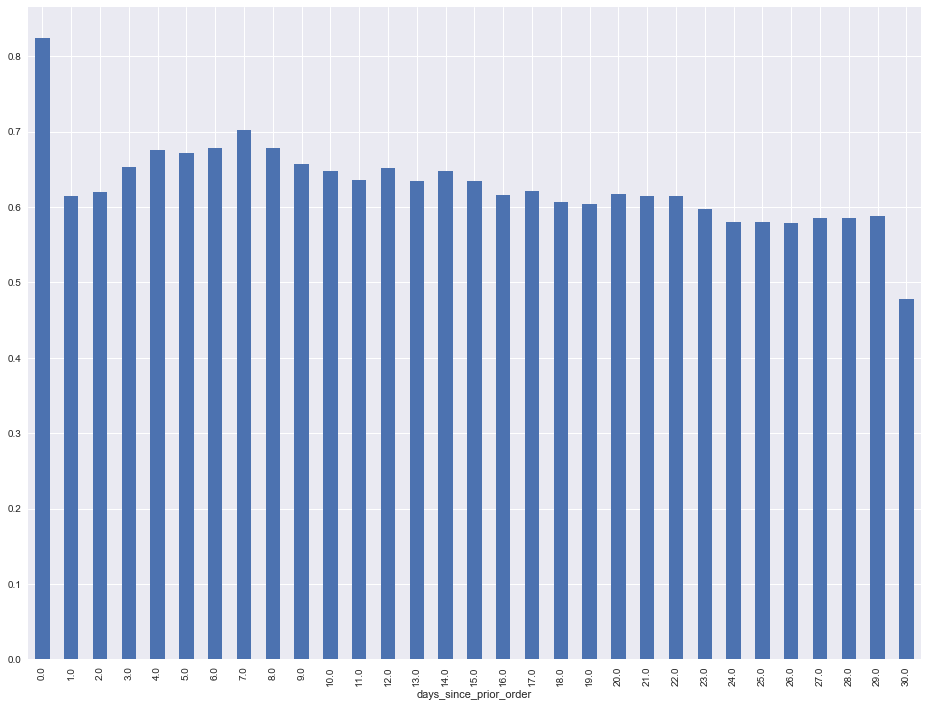

In [31]:
temp.reorder_prop.plot.bar()

In [32]:
temp = orders[orders.eval_set =="train"].join(train.groupby("order_id").reordered.apply(sum).rename("reorder_q"))
temp

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,reorder_q
order_id,,,,,,,
1187899,1,train,11,4,8,14.00,10
1492625,2,train,15,1,11,30.00,12
2196797,5,train,5,0,11,6.00,4
525192,7,train,21,2,11,6.00,8
880375,8,train,4,1,14,10.00,4
...,...,...,...,...,...,...,...
2585586,206199,train,20,2,16,30.00,14
943915,206200,train,24,6,19,6.00,11
2371631,206203,train,6,4,19,30.00,12


In [33]:
temp.reorder_q.value_counts().sort_index()

0      8602
1     15498
2     14773
3     13281
4     12014
      ...  
60        1
61        2
63        1
65        1
71        1
Name: reorder_q, dtype: int64

In [34]:
temp.reorder_q.clip(0, 10).value_counts(1).sort_index()

0    0.07
1    0.12
2    0.11
3    0.10
4    0.09
     ... 
6    0.07
7    0.06
8    0.05
9    0.04
10   0.22
Name: reorder_q, dtype: float64

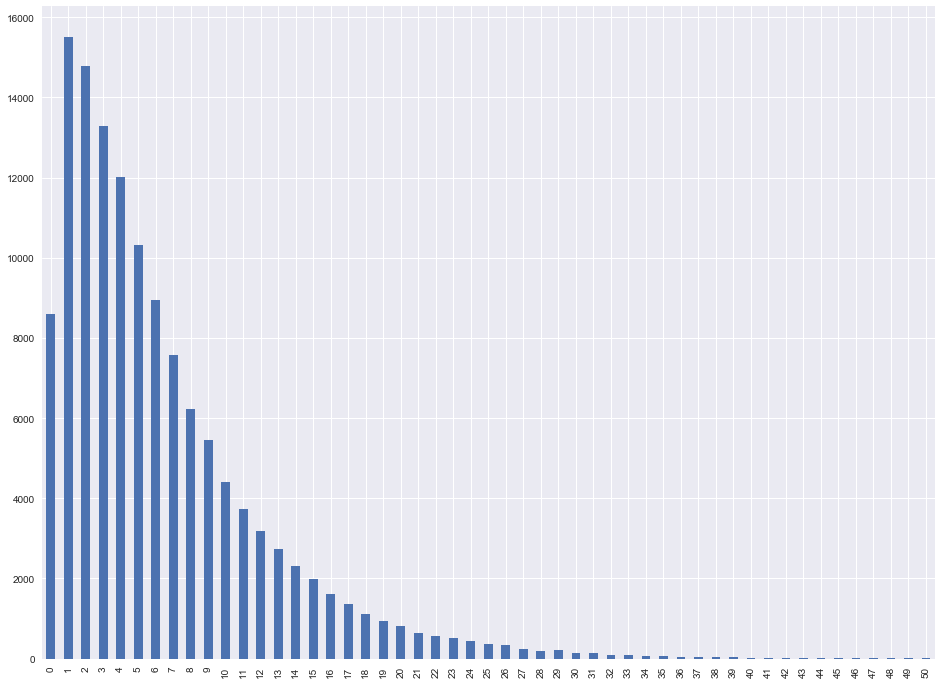

In [35]:
temp.reorder_q.clip(0, 50).value_counts().sort_index().plot.bar()